In [1]:
#Can we predict whether a marketing campaign will have a high ROI?

In [2]:
#Notebook 1 – Marketing Campaign Performance: EDA & Data Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots show in the notebook
%matplotlib inline

df = pd.read_csv("marketing_campaign_dataset.csv")   



print("Initial shape:", df.shape)
df.head()




Initial shape: (200000, 16)


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,1/01/2021
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2/01/2021
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,3/01/2021
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,4/01/2021
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,5/01/2021


In [4]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(' ', '_')
)


In [5]:
df['roi'] = pd.to_numeric(df['roi'], errors='coerce')
df['acquisition_cost'] = pd.to_numeric(df['acquisition_cost'], errors='coerce')
df['clicks'] = pd.to_numeric(df['clicks'], errors='coerce')
df['impressions'] = pd.to_numeric(df['impressions'], errors='coerce')


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   campaign_id       200000 non-null  int64  
 1   company           200000 non-null  object 
 2   campaign_type     200000 non-null  object 
 3   target_audience   200000 non-null  object 
 4   duration          200000 non-null  object 
 5   channel_used      200000 non-null  object 
 6   conversion_rate   200000 non-null  float64
 7   acquisition_cost  0 non-null       float64
 8   roi               200000 non-null  float64
 9   location          200000 non-null  object 
 10  language          200000 non-null  object 
 11  clicks            200000 non-null  int64  
 12  impressions       200000 non-null  int64  
 13  engagement_score  200000 non-null  int64  
 14  customer_segment  200000 non-null  object 
 15  date              200000 non-null  object 
dtypes: float64(3), int64

,campaign_id,conversion_rate,acquisition_cost,roi,clicks,impressions,engagement_score
count,200000.000000,200000.000000,0.0,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,NaN,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,NaN,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,NaN,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,NaN,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,NaN,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,NaN,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,NaN,8.000000,1000.000000,10000.000000,10.000000


In [7]:
df['conversion_rate'] = (
    df['conversion_rate']
    .astype(str)
    .str.replace('%', '', regex=False)
    .astype(float)
)


In [8]:
df = df.drop(columns=['campaign_id', 'date'])


In [9]:
df.info()
print("\nMissing values per column:\n", df.isna().sum())
print("\nAny duplicated rows?", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company           200000 non-null  object 
 1   campaign_type     200000 non-null  object 
 2   target_audience   200000 non-null  object 
 3   duration          200000 non-null  object 
 4   channel_used      200000 non-null  object 
 5   conversion_rate   200000 non-null  float64
 6   acquisition_cost  0 non-null       float64
 7   roi               200000 non-null  float64
 8   location          200000 non-null  object 
 9   language          200000 non-null  object 
 10  clicks            200000 non-null  int64  
 11  impressions       200000 non-null  int64  
 12  engagement_score  200000 non-null  int64  
 13  customer_segment  200000 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 21.4+ MB

Missing values per column:
 company                  0
ca

In [10]:
# Drop ID / date columns we don't use in the analysis
cols_to_drop = ['campaign_id', 'date']

# Only drop if they exist (safe)
cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df = df.drop(columns=cols_to_drop)

print("Shape after dropping columns:", df.shape)
df.head()


Shape after dropping columns: (200000, 14)


,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment
0,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,NaN,6.29,Chicago,Spanish,506,1922,6,Health & Wellness
1,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,NaN,5.61,New York,German,116,7523,7,Fashionistas
2,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,NaN,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers
3,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,NaN,5.55,Miami,Mandarin,217,1820,7,Health & Wellness
4,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,NaN,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness


In [11]:

if 'conversion_rate' in df.columns:
    df['conversion_rate'] = (
        df['conversion_rate']
          .astype(str)
          .str.replace('%', '', regex=False)
          .astype(float)
    )


numeric_cols = ['roi', 'clicks', 'impressions', 'engagement_score', 'acquisition_cost']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("After numeric conversion:")
print(df[['roi', 'clicks', 'impressions', 'engagement_score']].head())
print("\nDescribe:")
print(df[['roi', 'clicks', 'impressions', 'engagement_score']].describe())


After numeric conversion:
    roi  clicks  impressions  engagement_score
0  6.29     506         1922                 6
1  5.61     116         7523                 7
2  7.18     584         7698                 1
3  5.55     217         1820                 7
4  6.50     379         4201                 3

Describe:
                 roi         clicks    impressions  engagement_score
count  200000.000000  200000.000000  200000.000000     200000.000000
mean        5.002438     549.772030    5507.301520          5.494710
std         1.734488     260.019056    2596.864286          2.872581
min         2.000000     100.000000    1000.000000          1.000000
25%         3.500000     325.000000    3266.000000          3.000000
50%         5.010000     550.000000    5517.500000          5.000000
75%         6.510000     775.000000    7753.000000          8.000000
max         8.000000    1000.000000   10000.000000         10.000000


In [12]:
print("Shape:", df.shape)
print(df.dtypes)

print("\nSample of important numeric columns:")
print(df[['roi', 'clicks', 'impressions', 'engagement_score']].head())

print("\nDescribe numeric columns:")
print(df[['roi', 'clicks', 'impressions', 'engagement_score']].describe())


Shape: (200000, 14)
company              object
campaign_type        object
target_audience      object
duration             object
channel_used         object
conversion_rate     float64
acquisition_cost    float64
roi                 float64
location             object
language             object
clicks                int64
impressions           int64
engagement_score      int64
customer_segment     object
dtype: object

Sample of important numeric columns:
    roi  clicks  impressions  engagement_score
0  6.29     506         1922                 6
1  5.61     116         7523                 7
2  7.18     584         7698                 1
3  5.55     217         1820                 7
4  6.50     379         4201                 3

Describe numeric columns:
                 roi         clicks    impressions  engagement_score
count  200000.000000  200000.000000  200000.000000     200000.000000
mean        5.002438     549.772030    5507.301520          5.494710
std         1.734488

In [13]:
print("Final shape:", df.shape)
print("\nMissing values per column after cleaning:\n", df.isna().sum())



Final shape: (200000, 14)

Missing values per column after cleaning:
 company                  0
campaign_type            0
target_audience          0
duration                 0
channel_used             0
conversion_rate          0
acquisition_cost    200000
roi                      0
location                 0
language                 0
clicks                   0
impressions              0
engagement_score         0
customer_segment         0
dtype: int64


In [14]:
sample_df = df.sample(frac=0.03, random_state=42)
print("Sample shape:", sample_df.shape)



Sample shape: (6000, 14)


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company           200000 non-null  object 
 1   campaign_type     200000 non-null  object 
 2   target_audience   200000 non-null  object 
 3   duration          200000 non-null  object 
 4   channel_used      200000 non-null  object 
 5   conversion_rate   200000 non-null  float64
 6   acquisition_cost  0 non-null       float64
 7   roi               200000 non-null  float64
 8   location          200000 non-null  object 
 9   language          200000 non-null  object 
 10  clicks            200000 non-null  int64  
 11  impressions       200000 non-null  int64  
 12  engagement_score  200000 non-null  int64  
 13  customer_segment  200000 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 21.4+ MB


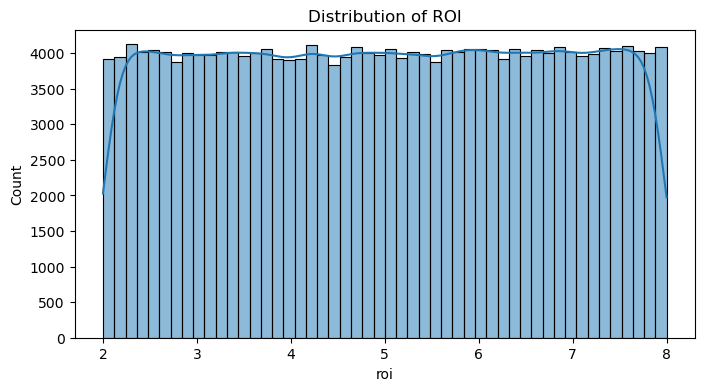

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(df['roi'], bins=50, kde=True)
plt.title("Distribution of ROI")
plt.xlabel("roi")
plt.ylabel("Count")
plt.show()



In [16]:
import seaborn as sns

sns.pairplot(
    sample_df[['roi', 'conversion_rate', 'clicks', 'impressions', 'engagement_score']],
    diag_kind='kde'
)


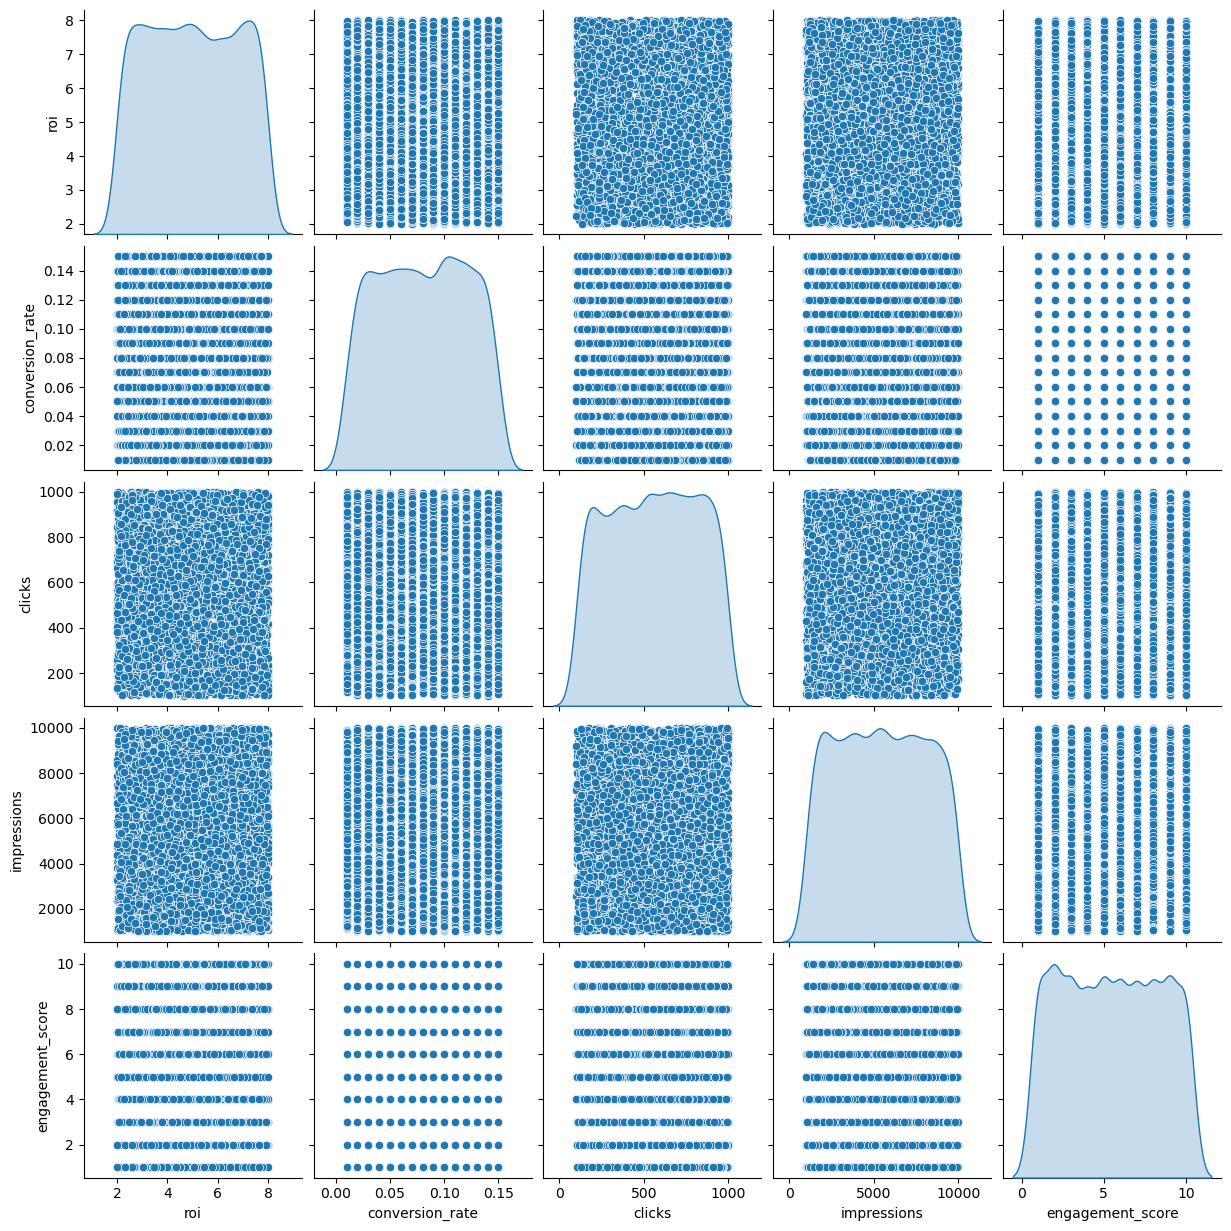

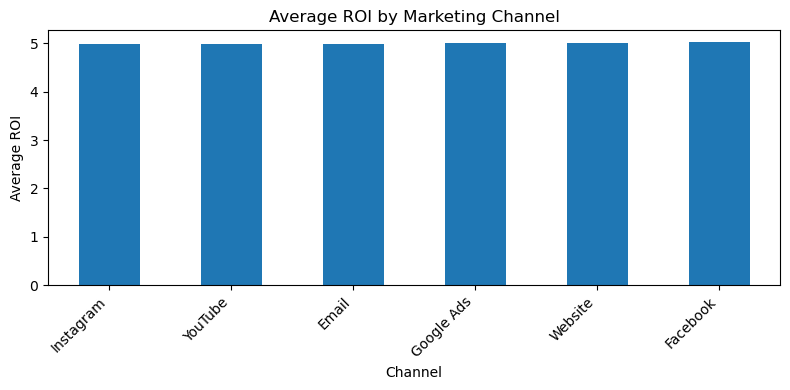

In [17]:
plt.figure(figsize=(8, 4))
(df.groupby('channel_used')['roi']
   .mean()
   .sort_values()
   .plot(kind='bar'))
plt.title("Average ROI by Marketing Channel")
plt.ylabel("Average ROI")
plt.xlabel("Channel")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




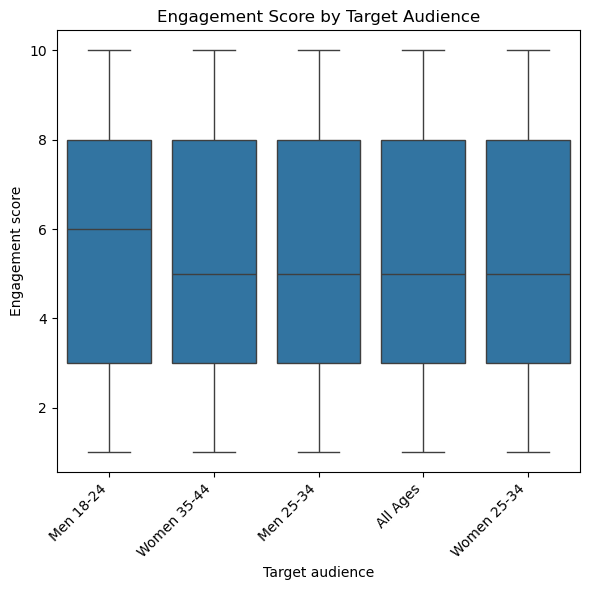

In [18]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='target_audience', y='engagement_score')
plt.title("Engagement Score by Target Audience")
plt.xlabel("Target audience")
plt.ylabel("Engagement score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


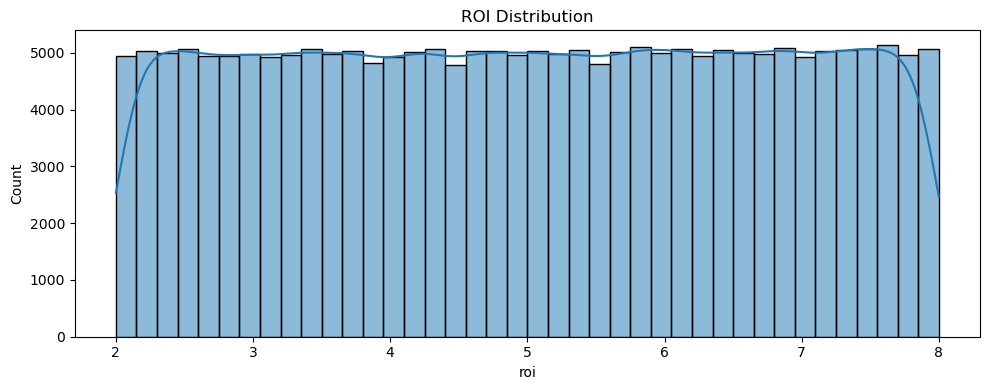

In [19]:
plt.figure(figsize=(10, 4))
sns.histplot(df['roi'], bins=40, kde=True)
plt.title("ROI Distribution")
plt.xlabel("roi")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



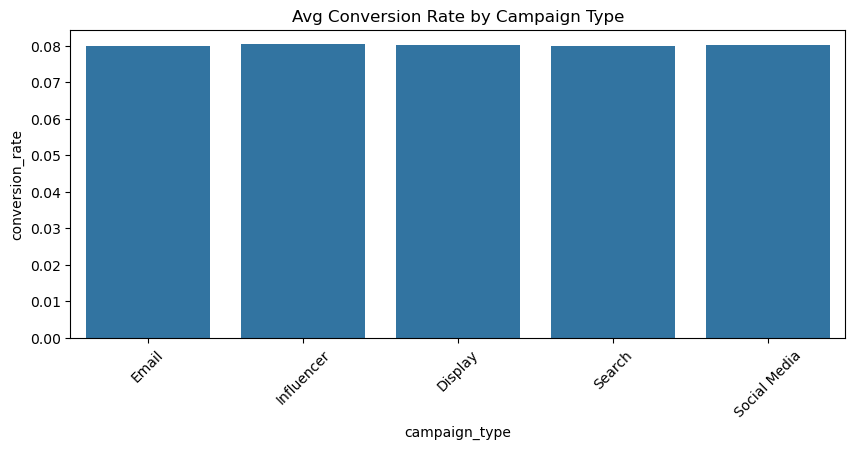

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='campaign_type', y='conversion_rate', estimator=np.mean, errorbar=None)
plt.xticks(rotation=45)
plt.title("Avg Conversion Rate by Campaign Type")
plt.show()


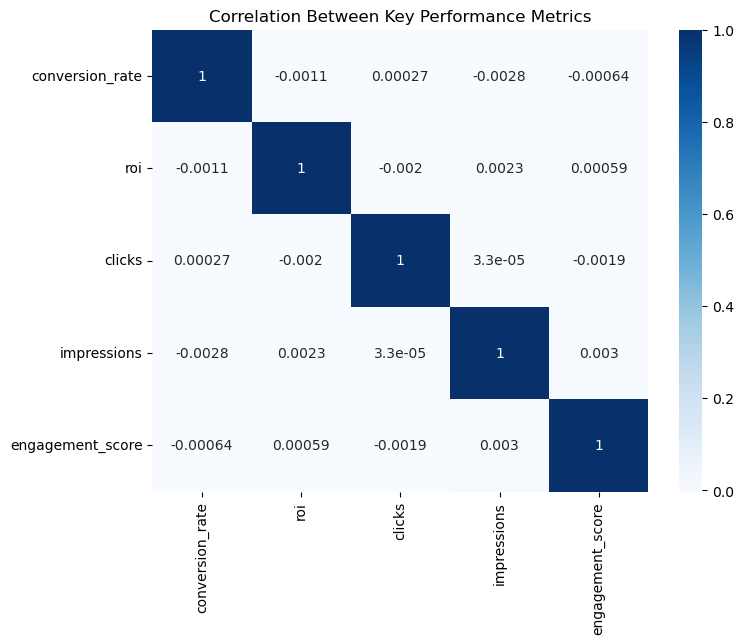

In [21]:
num_cols = ['conversion_rate','roi','clicks','impressions','engagement_score']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Key Performance Metrics")
plt.show()


In [22]:
df.shape

(200000, 14)

In [23]:
df['roi'].head()
df['roi'].dtype
df['roi'].isna().sum()
df['roi'].describe()


count    200000.000000
mean          5.002438
std           1.734488
min           2.000000
25%           3.500000
50%           5.010000
75%           6.510000
max           8.000000
Name: roi, dtype: float64

In [25]:
df.to_csv("marketing_campaign_cleaned.csv", index=False)


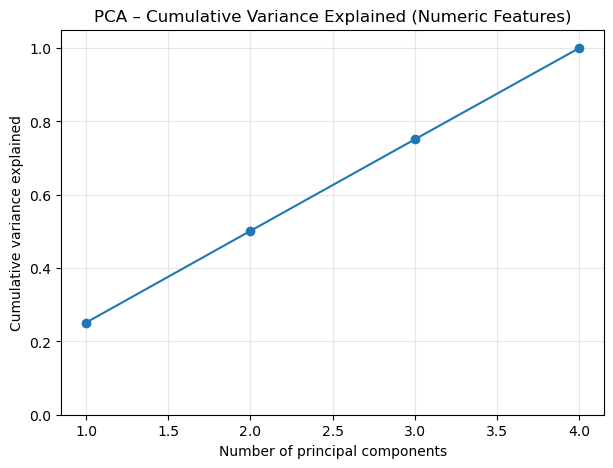

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1. Select numeric features for PCA (no IDs or categories)
num_cols = ['conversion_rate', 'clicks', 'impressions', 'engagement_score']

X_num = df[num_cols].copy()

# 2. Standardise the features (mean 0, std 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# 3. Fit PCA
pca = PCA(n_components=len(num_cols))
X_pca = pca.fit_transform(X_scaled)

# 4. Cumulative variance explained
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(7, 5))
plt.plot(range(1, len(num_cols) + 1), cum_var, marker='o')
plt.title('PCA – Cumulative Variance Explained (Numeric Features)')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)
plt.show()


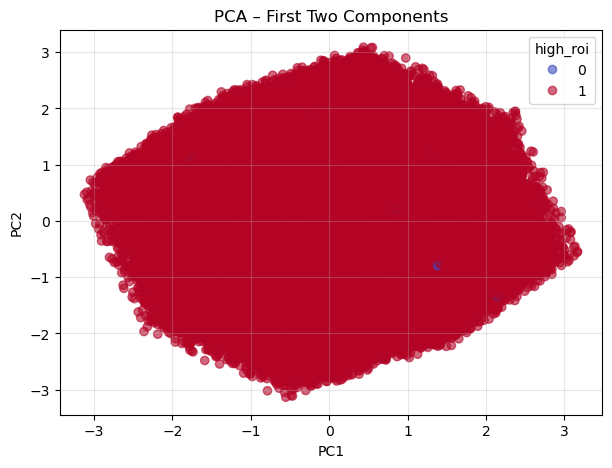

In [27]:
high_roi_flag = (df['roi'] > 2.0).astype(int)

plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=high_roi_flag,
    cmap='coolwarm',
    alpha=0.6
)
plt.title('PCA – First Two Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title='high_roi')
plt.grid(True, alpha=0.3)
plt.show()
